In [1]:
# Import dependencies
import pandas as pd
import pathlib as Path
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import tensorflow as tf
import keras_tuner as kt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


2023-11-16 22:11:13.169888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Read in csv file
Raw_data = pd.read_csv("../Resources/diabetes_prediction_dataset.csv")
Raw_data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
#Count of null values
Raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
#Show data types, structure of data frame
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
Raw_data["smoking_history"].replace (
{"never":2, "No Info":3,
"current":4, "former":5,
"not current":6, "ever":7},
inplace=True)
Raw_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,2,25.19,6.6,140,0
1,Female,54.0,0,0,3,27.32,6.6,80,0
2,Male,28.0,0,0,2,27.32,5.7,158,0
3,Female,36.0,0,0,4,23.45,5.0,155,0
4,Male,76.0,1,1,4,20.14,4.8,155,0


In [6]:
Raw_data["gender"].replace (
{"Male": 2, "Female": 3, "Other": 4},
inplace=True)
Raw_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


In [7]:
Raw_data = Raw_data.astype({"gender":np.int64, "smoking_history":np.int64})
Raw_data.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
#Determine the number of unique values in each column
Raw_data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

/var/folders/9f/lxqscb096g922jr1gj3dqbb80000gn/T/ipykernel_17819/3620892842.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot((length), 4, j + 1)


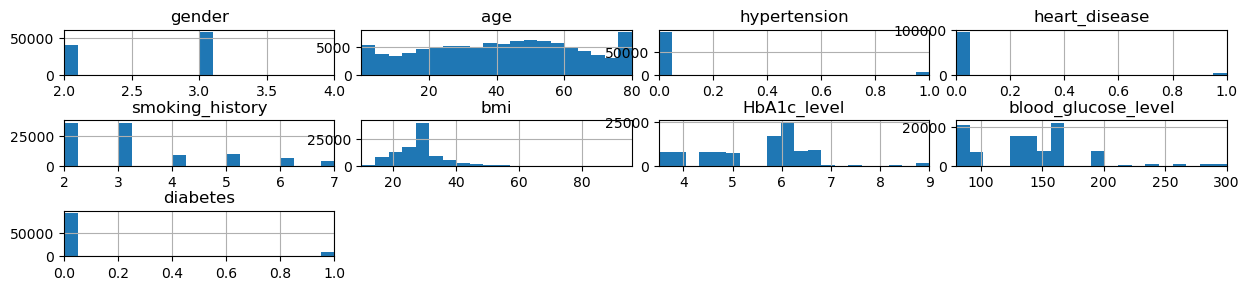

In [9]:
#Histogram of each feature
import itertools
import matplotlib.pyplot as plt

col = Raw_data.columns[:9]
plt.subplots(figsize=(15, 10))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length), 4, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=1.0)
    
    # Set a common x-axis range for all histograms
    plt.xlim([min(Raw_data[i]), max(Raw_data[i])])
    
    Raw_data[i].hist(bins=20)
    plt.title(i)

plt.show()